# Airline Dataset

# 1. Import Libraries

In [126]:
import pandas as pd                         #data
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import plotly.graph_objects as go           #visualisation
from plotly.subplots import make_subplots   #visualisation
import plotly.express as px                 #visualisation
import scipy.stats as stats                 #statistics
from scipy.stats import ttest_ind           #statistics
from scipy.stats import shapiro             #statistics
from wordcloud import WordCloud, STOPWORDS  #wordcloud
from sklearn.preprocessing import LabelEncoder #encoding
import warnings                             #warnings
warnings.filterwarnings('ignore')           #warnings

# 2. Loading the data

In [127]:
#Read File from CSV file and saving it in airline_data DataFrame
df = pd.read_csv("airline_data.csv")
airline_data = df

df2 = pd.read_csv("airport_codes.csv")
airport_codes = df2
city_codes = df2

In [128]:
# To display the top 5 rows
airline_data.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure


In [129]:
#InfoDescribe to see an overview of the Dataframe
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [130]:
#Descriptive Analytics of the numerical Variable "Rating"
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


# 3. Data Pre-processing

In [131]:
#Checkign the percentage of Null values betweeen the total of values per column
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name     0.000000
Flying_month      21.368715
Route             21.340782
Rating             0.139665
Verified          64.525140
Review_title       0.000000
Review_content     0.000000
Traveller_type     0.000000
Class              0.027933
dtype: float64

In [132]:
#Drop "Verified" parameter as it has more than 60% of null values and the data can not be gather from other parameters 
airline_data.drop('Verified',axis=1, inplace = True)

## 3.1 Cleaning: 'Class'

In [133]:
#Exploring the Data in the Column 'Class', there are 8 values that are different from: Business Class, Economy Class, First Class, Premium Economy.
airline_data.groupby('Class').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type
Class,,,,,,,
Business,430,430,430,430,430,430,430
Business Class,183,183,183,183,183,183,183
Couple Leisure,641,641,641,641,641,641,641
Economy Class,676,675,676,676,676,676,676
Family Leisure,234,234,234,234,234,234,234
First Class,11,11,11,11,11,11,11
LHR to ORD,1,1,1,1,1,1,1
London to Malaga,1,1,1,1,1,1,1
Los Angeles to London to Paris to Rome,1,1,1,1,1,1,1


In [134]:
#To leave the original data fixed, we will create a new temporal parameter called "Class_temporal" to modify and clean
airline_data['Class_temporal'] = airline_data['Class']

In [135]:
#After filter the rows to be cleaned in the "Class_temporal" parameter, we found there is "Class" data in the Route Parameter. We proceed to copy that data a new variable called "Class_in_Route"
Class_in_route = airline_data[(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class')]['Route']

In [136]:
#Then, we paste this "Class_in_route" data to
airline_data['Class_temporal'][(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')] = Class_in_route

In [137]:
#We check again and there is only 3 values our of the "Class" real values
airline_data.groupby('Class_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
Class_temporal,,,,,,,,
Business Class,866,866,866,866,866,866,866,866
Economy Class,1522,1521,1522,1522,1522,1522,1522,1522
First Class,154,154,154,154,154,154,154,154
Jan-17,1,1,1,1,1,1,1,1
Jul-22,1,1,1,1,1,1,1,1
May-15,1,1,1,1,1,1,1,1
Premium Economy,271,271,271,271,271,271,271,271


In [138]:
#We can see there is data in Traveller Type that should be in Class
airline_data[(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal
224,Mark Robinson,no,Jul-22,1.0,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga,Jul-22
1748,Simon Warner,no,Jan-17,5.0,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,LHR to ORD,Jan-17
2794,Tom Moore,no,May-15,1.0,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,Solo Leisure,Los Angeles to London to Paris to Rome,May-15
2816,Charlotte Stiley,NaN,NaN,1.0,British Airways customer review,Travelled from Venice to Gatwick on 28th May c...,Business Class,no,NaN
2817,Tarun Thadani,NaN,NaN,2.0,British Airways customer review,Worst customer experience on BA flight. I have...,Economy Class,no,NaN
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN


In [139]:
#Copying data found in the variable "Class_in_traveller"
Class_in_traveller = airline_data[(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')]['Traveller_type']

In [140]:
#Pasting the data in the feature 'Class_temporal'
airline_data['Class_temporal'][(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')] = Class_in_traveller

In [141]:
airline_data.groupby('Class_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
Class_temporal,,,,,,,,
Business Class,1161,867,867,1160,1161,1161,1161,1161
Economy Class,1849,1521,1522,1846,1849,1849,1849,1849
First Class,210,155,155,209,210,210,210,210
Premium Economy,358,271,271,358,358,358,358,358
Solo Leisure,1,1,1,1,1,1,1,1
no,1,0,0,1,1,1,1,0


In [142]:
#Last 2 rows, the data can be deducted from the review comment and will be assing it as Economy Class
airline_data['Class_temporal'][(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')] = 'Economy Class'

In [143]:
#All the rows of the dataframe contains the right information in the parameter 'Class_temporal'
airline_data.groupby('Class_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
Class_temporal,,,,,,,,
Business Class,1161,867,867,1160,1161,1161,1161,1161
Economy Class,1851,1522,1523,1848,1851,1851,1851,1850
First Class,210,155,155,209,210,210,210,210
Premium Economy,358,271,271,358,358,358,358,358


In [144]:
#Descriptive Analytics of the numerical Variable "Rating"
airline_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,3575.0,4.79049,3.170323,1.0,2.0,4.0,8.0,10.0


## 3.2 Cleaning: Traveller Type

In [145]:
#Exploring the Data in the Column 'Class', there are 8 values that are different from: Business Class, Economy Class, First Class, Premium Economy.
airline_data.groupby('Traveller_type').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Class,Class_temporal
Traveller_type,,,,,,,,
767-300,1,1,1,1,1,1,1,1
777,3,3,3,3,3,3,3,3
777-200,1,1,1,1,1,1,1,1
777-300,1,1,1,1,1,1,1,1
787,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
Saab 2000,1,1,1,1,1,1,1,1
Solo Leisure,307,307,307,307,307,307,307,307
Various,1,1,1,1,1,1,1,1


In [146]:
#To leave the original data fixed, we will create a new temporal parameter called "Traveller_temporal" to modify and clean
airline_data['Traveller_temporal'] = airline_data['Traveller_type']

In [147]:
#Filtering the rows to be cleaned in the "Traveller_temporal" feature, we found "Traveller type" data in the Class variable. We copy the data into the new variable "Traveller_in_Class"
Traveller_in_class = airline_data['Class'][(airline_data['Traveller_temporal'] != 'Solo Leisure') & (airline_data['Traveller_temporal'] != 'Family Leisure') & (airline_data['Traveller_temporal'] != 'Business') & (airline_data['Traveller_temporal'] != 'Couple Leisure')]

In [148]:
#Then, we paste the data into the Traveller_temporal feature instances
airline_data['Traveller_temporal'][(airline_data['Traveller_temporal'] != 'Solo Leisure') & (airline_data['Traveller_temporal'] != 'Family Leisure') & (airline_data['Traveller_temporal'] != 'Business') & (airline_data['Traveller_temporal'] != 'Couple Leisure')] = Traveller_in_class

In [149]:
#We check again, and there are still values to clean
airline_data.groupby('Traveller_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal
Traveller_temporal,,,,,,,,,
Business,623,623,623,623,623,623,623,623,623
Couple Leisure,949,949,949,949,949,949,949,949,949
Family Leisure,382,381,382,382,382,382,382,382,382
LHR to ORD,1,1,1,1,1,1,1,1,1
London to Malaga,1,1,1,1,1,1,1,1,1
Solo Leisure,860,860,860,860,860,860,860,860,860
no,322,0,0,317,322,322,322,322,322
yes,441,0,0,441,441,441,441,441,441


In [150]:
#Looking at other parameter, the information can not be found in any of them
airline_data[(airline_data['Traveller_temporal'] != 'Solo Leisure') & (airline_data['Traveller_temporal'] != 'Family Leisure') & (airline_data['Traveller_temporal'] != 'Business') & (airline_data['Traveller_temporal'] != 'Couple Leisure')]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal
224,Mark Robinson,no,Jul-22,1.0,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga,Business Class,London to Malaga
1748,Simon Warner,no,Jan-17,5.0,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,LHR to ORD,First Class,LHR to ORD
2816,Charlotte Stiley,NaN,NaN,1.0,British Airways customer review,Travelled from Venice to Gatwick on 28th May c...,Business Class,no,Business Class,no
2817,Tarun Thadani,NaN,NaN,2.0,British Airways customer review,Worst customer experience on BA flight. I have...,Economy Class,no,Economy Class,no
2818,Thomas Varughese,NaN,NaN,1.0,British Airways customer review,I had this terrible experience of traveling Br...,Economy Class,no,Economy Class,no
...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Economy Class,no
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Economy Class,no
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Business Class,yes


In [151]:
#We set all those values as 'Unknown' 
airline_data['Traveller_temporal'][(airline_data['Traveller_temporal'] != 'Solo Leisure') & (airline_data['Traveller_temporal'] != 'Family Leisure') & (airline_data['Traveller_temporal'] != 'Business') & (airline_data['Traveller_temporal'] != 'Couple Leisure')] = 'Unknown'

In [152]:
airline_data.groupby('Traveller_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal
Traveller_temporal,,,,,,,,,
Business,623,623,623,623,623,623,623,623,623
Couple Leisure,949,949,949,949,949,949,949,949,949
Family Leisure,382,381,382,382,382,382,382,382,382
Solo Leisure,860,860,860,860,860,860,860,860,860
Unknown,766,2,2,761,766,766,766,765,766


## 3.4 Cleaning: Flying Month

In [153]:
#Creating a new Flying Month temporal variable
airline_data['Flying_month_temporal'] = airline_data['Flying_month']

In [154]:
#There are 8 rows in Route that can be used in Flying Month 
airline_data[(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False)) & (airline_data['Route'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal
42,Nicholas Felty,no,May-23,1.0,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class,Business Class,Couple Leisure,no
224,Mark Robinson,no,Jul-22,1.0,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga,Business Class,Unknown,no
234,Paul Mayer,no,Jun-22,1.0,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class,Business Class,Family Leisure,no
419,barbara ciereszko,no,Jul-21,1.0,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class,Economy Class,Family Leisure,no
1748,Simon Warner,no,Jan-17,5.0,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,LHR to ORD,First Class,Unknown,no
2552,Steve Purkis,no,Feb-15,1.0,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class,Economy Class,Family Leisure,no
2567,Travis Rodgers,no,Sep-15,5.0,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class,Economy Class,Couple Leisure,no
2794,Tom Moore,no,May-15,1.0,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,Solo Leisure,Los Angeles to London to Paris to Rome,Economy Class,Solo Leisure,no


In [155]:
#Filtering and copying the Flying month data from Route 
Flying_month_in_route = airline_data['Route'][(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False)) & (airline_data['Route'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))]

In [156]:
#Pasting the filtering data in the Flying Month temporal Parameter
airline_data['Flying_month_temporal'][(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False)) & (airline_data['Route'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))] = Flying_month_in_route

In [157]:
#Checking all the other columns, there are not Flying Month data in the other Columns. Except in Review Content, however the data is not uniform to be extracted.
airline_data[(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False)) & (airline_data['Review_content'].str.contains('|'.join(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal
7,Richard Hodges,London Heathrow to Kalamata,Economy Class,7.0,Economy class seating was truly dreadful,Travelled to Heathrow to Kalamata and return j...,Boeing 737,Couple Leisure,Economy Class,Couple Leisure,London Heathrow to Kalamata
19,Benjamin Stevens,Seattle to Edinburgh via Heathrow,Economy Class,1.0,customer service was horrendous,"May 3, flew from Seattle to Heathrow then to E...",Boeing 777,Business,Economy Class,Business,Seattle to Edinburgh via Heathrow
35,Steve Bennett,London to Nice,Business Class,4.0,do not think the fare was worth the money,Paid a quick visit to Nice yesterday from Heat...,A319,Couple Leisure,Business Class,Couple Leisure,London to Nice
110,C Barton,London to Madrid,Economy Class,1.0,found the attitude appalling,My review relates to the appalling experiences...,A320,Solo Leisure,Economy Class,Solo Leisure,London to Madrid
130,C Bain,Atlanta to London,Economy Class,4.0,This flight was so disappointing,Flew ATL to LHR 8th Jan 2023. Was unlucky enou...,Boeing 777-200,Family Leisure,Economy Class,Family Leisure,Atlanta to London
...,...,...,...,...,...,...,...,...,...,...,...
3564,C Denson,NaN,NaN,10.0,British Airways customer review,Chicago O'Hare to London Heathrow on 2 May. ch...,Economy Class,yes,Economy Class,Unknown,NaN
3566,Iain Henderson,NaN,NaN,1.0,British Airways customer review,BA 059 London to Cape Town April 29 2014 econo...,Economy Class,no,Economy Class,Unknown,NaN
3569,Jack Hughes,NaN,NaN,8.0,British Airways customer review,Heathrow Marrakech. Had previously travelled o...,Economy Class,yes,Economy Class,Unknown,NaN
3570,D Nolan,NaN,NaN,5.0,British Airways customer review,Flew return in CW from LHR to BKK in August 20...,Business Class,yes,Business Class,Unknown,NaN


In [158]:
#We filter out all the values that contains a year format
airline_data['Flying_month_temporal'][(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))] = 'Unknown'
airline_data['Flying_month_temporal'][airline_data['Flying_month_temporal'].isnull() == True] = 'Unknown'

In [159]:
#Creating a subset with the Flying month that can be used to analysis
airline_data['Flying_month_temporal'][(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))] = 0

In [160]:
#For visualization and answer a questions, splitting the Month to get the months
airline_data['Month'] = airline_data['Flying_month_temporal'].str[0:3]
airline_data['Year'] = airline_data['Flying_month_temporal'].str[4:6]
airline_data['Month_num'] = airline_data['Month']

In [161]:
#Updating the aprameter with the full month name
airline_data['Month_num'] = airline_data['Month_num'].replace('Jan',1)
airline_data['Month_num'] = airline_data['Month_num'].replace('Feb',2)
airline_data['Month_num'] = airline_data['Month_num'].replace('Mar',3)
airline_data['Month_num'] = airline_data['Month_num'].replace('Apr',4)
airline_data['Month_num'] = airline_data['Month_num'].replace('May',5)
airline_data['Month_num'] = airline_data['Month_num'].replace('Jun',6)
airline_data['Month_num'] = airline_data['Month_num'].replace('Jul',7)
airline_data['Month_num'] = airline_data['Month_num'].replace('Aug',8)
airline_data['Month_num'] = airline_data['Month_num'].replace('Sep',9)
airline_data['Month_num'] = airline_data['Month_num'].replace('Oct',10)
airline_data['Month_num'] = airline_data['Month_num'].replace('Nov',11)
airline_data['Month_num'] = airline_data['Month_num'].replace('Dec',12)

In [162]:
airline_data['Year'] = airline_data['Year'].replace('23',2023)
airline_data['Year'] = airline_data['Year'].replace('22',2022)
airline_data['Year'] = airline_data['Year'].replace('21',2021)
airline_data['Year'] = airline_data['Year'].replace('20',2020)
airline_data['Year'] = airline_data['Year'].replace('19',2019)
airline_data['Year'] = airline_data['Year'].replace('18',2018)
airline_data['Year'] = airline_data['Year'].replace('17',2017)
airline_data['Year'] = airline_data['Year'].replace('16',2016)
airline_data['Year'] = airline_data['Year'].replace('15',2015)
airline_data['Year'] = airline_data['Year'].replace('14',2014)
airline_data['Year'] = airline_data['Year'].replace('13',2013)
airline_data['Year'] = airline_data['Year'].replace('12',2012)

In [163]:
#Descriptive Analytics of the numerical Variable "Rating"
airline_data

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal,Month,Year,Month_num
0,Paige Boet,Jun-23,New Orleans to London,1.0,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jun-23,Jun,2023.0,6.0
1,S Layne,Mar-23,London to Amman,1.0,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Business Class,Couple Leisure,Mar-23,Mar,2023.0,3.0
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Business Class,Solo Leisure,0,NaN,NaN,NaN
3,Joel Burman,Jun-23,Amman to London,4.0,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jun-23,Jun,2023.0,6.0
4,R Vines,London City to Ibiza,Business Class,7.0,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Business Class,Family Leisure,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Business Class,Unknown,0,NaN,NaN,NaN


## 3.4 Cleaning: Route

In [164]:
airline_data.groupby('Route')['Route'].count()

Route
 Bridgetown to Gatwick        1
 London Heathrow to Madrid    1
ABV to LHR                    1
ABZ to SFO via LHR            1
ACC to LHR                    1
                             ..
Zagreb to London              1
Zagreb to London Heathrow     1
Zurich to London              5
Zurich to London Heathrow     2
yes                           1
Name: Route, Length: 744, dtype: int64

In [165]:
#Create New Column to modify as the column could have data usefull for others
airline_data['Route_temporal'] = airline_data['Route']

In [166]:
#There are data of Routes in 1,858 instances of Flying Month feature
Route_in_flying = airline_data[(airline_data['Route_temporal'] == 'Premium Economy') | (airline_data['Route_temporal'] == 'Business Class') | (
                airline_data['Route_temporal'] == 'First Class') | (airline_data['Route_temporal'] == 'Economy Class')]['Flying_month']

In [167]:
#Paste Data in the new Class Column, filtering by rows without relevant information for Class
airline_data['Route_temporal'][(airline_data['Route_temporal'] == 'Premium Economy') | (airline_data['Route_temporal'] == 'Business Class') | (
                airline_data['Route_temporal'] == 'First Class') | (airline_data['Route_temporal'] == 'Economy Class')] = Route_in_flying

In [168]:
#Copying ans pasting data from Class into the Route temporal feature
airline_data['Route_temporal'][(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Class'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class') & (airline_data['Class'] != 'no') & (airline_data['Class'] != 'yes') & (airline_data['Class'] != 'Family Leisure') & (airline_data['Class'].isnull() == False)] = airline_data[(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Class'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class') & (airline_data['Class'] != 'no') & (airline_data['Class'] != 'yes') & (airline_data['Class'] != 'Family Leisure') & (airline_data['Class'].isnull() == False)]['Class']

In [169]:
airline_data[(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal,Month,Year,Month_num,Route_temporal
42,Nicholas Felty,no,May-23,1.0,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class,Business Class,Couple Leisure,May-23,May,2023.0,5.0,May-23
234,Paul Mayer,no,Jun-22,1.0,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class,Business Class,Family Leisure,Jun-22,Jun,2022.0,6.0,Jun-22
419,barbara ciereszko,no,Jul-21,1.0,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class,Economy Class,Family Leisure,Jul-21,Jul,2021.0,7.0,Jul-21
2552,Steve Purkis,no,Feb-15,1.0,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class,Economy Class,Family Leisure,Feb-15,Feb,2015.0,2.0,Feb-15
2567,Travis Rodgers,no,Sep-15,5.0,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class,Economy Class,Couple Leisure,Sep-15,Sep,2015.0,9.0,Sep-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN,NaN
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN,NaN
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN,NaN
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Business Class,Unknown,0,NaN,NaN,NaN,NaN


In [170]:
route_in_review = ['Heathrow to Tokyo','HER-LGW','Heathrow to San Francisco','Heathrow to Athens','Tampa from Gatwick','Punta Cana - Gatwick','LHR-PEK','EWR to LHR','LGW-PUJ-LGW','Bangkok to London Heathrow','ZRH-LHR','LHR-ATL-LHR','JNB-LHR','LGW-HER','Gatwick to Florida','Gatwick-Naples','Tampa - Gatwick','LGW-CUN-LGW','LGW-RAK-LGW','BLQ-LGW','YYZ-LHR-BRU','LGW-AGP','Madrid-London','LHR to Istanbul','BRU-LHR-YYZ','LAX-LHR-LAX','LHR to CPT','CPT-LHR-MAD','MAN-LHR-YYZ','BRU-LHR-LAX','LGW-MCO-LGW','LHR-EZE','Pisa-LGW','Heathrow to Istanbul','London to Seattle','Manchester to JFK','Gatwick to Barbados','IST-LHR','LCY-ZHR','SAT-DFW-LHR-BRU','LGW-Pisa','LHR-MAD','LHR-SYD-MAD','LHR-SFO-LHR','Heathrow to Bilbao','NCL-LHR','Gatwick to Kingston','Hong Kong to London','LHR-Sidney','LHR-GVA','Sydney-LHR','LHR-BKK','LHR-AMS-LHR','LHR-PHL','LHR to SYD','LHR to Tokyo','Heathrow to Bologna','DEL-LHR','Heathrow to Rome','Delhi to Heathrow','Seattle USA - Heathrow','LGW to LAS','LHR-FRA','MAN-LHR-ATL','MIA-LHR','Bangkok from London','LHR-YVR','LHR Philadelphia','Shanghai to London','Warsaw to Heathrow','LGW-JER-LGW','VIE-LHR','LHR-IAD-LHR','LHR-PHL','DEL-LHR-HAM','GRU-LHR','GVA-LGW-GVA','London to Budapest','LHR-PISA-LHR','LGW-TFS-LGW','Warsaw to Heathrow','LHR-YVR','LGW-JER-LGW','London Heathrow to Dubai','VIE-LHR','LHR-IAD-LHR','LHR-DEL','BRU-EWR','LHR-SIN','LHR-PHL','LHR-LAX','YYZ-DXB','LHR to Frankfurt','LHR to YVR','LHR-Washington','SFO to Milan','IAD-LHR-IAS','Johannesburg to London','Heathrow to Boston','Heathrow to Boston','Heathrow to Washington','LHR-CDG','LAX-LHR','LHR-JFK','Sydney to Singapore','LHR-Zurich','JHB to LHR','LHR-Zurich','LHR-HGK','LHR-MIA','MIA-LHR','MAD-LHR','LGW-ACF','DEN-LHR','NCL-LHR','BKK-LHR','LHR-SIN','DUB-LCY','CPT-JNB','LGW to MCO','SFO-LHR','LGW-MLA','LGW-CUN','LGW-Barcelona','LHR-HKG','Miami to Brussels','LHR to Denver Colorado','MAD-SCL','Manchester to LHR','Los Angeles - Heathrow','LIS-LHR','LGW to TFS','LHR-Prague','HAM-LHR','SAN-MUC','Austin to London','LHR-SFO','London-Prague','TPA - LGW','VIE-LHR','LHR to LAX','Phoenix to London','LHR to IST','LHR-HEL','BGI-LGW','LHR to Seattle','IAH-LHR','YVR-LHR','LHR-BGO','LCA-LHR','London Coty to Florence','NBO-LHR','AMS-LHR','LHR to DXB','MCT to LHR','LHR-ZHR','Kingston to London','LHR-JNB','LGW to Cancun','LGW-ACE','BRU-Toronto','LGW to TFS','LHR to PHX','LHR to Las Vegas','Gatwick to Marrakech','Toronto to London','GIG-LHR','LHR-DEL','IAD-LHR','London to Calgary','OSL-LHR','LGW to Catania','Lucia to London','Aberdeen-Heathrow','LGW to CMB','LHR-MXP','LHR-NCL','LGW to SZG','VIE to LHR','Singapore-London','LHR-FCO','Rome to London Gatwick','LHR-Hannover Germany','LGW to Alicante','Gatwick-Colombia','LHR-NCL','BHD-LHR','LHR-SIS','LHR-SIN','LHR-BUD','Madrid-London','LHR-EWR','LHR-BOS','LHR - IST','LHR-MCT','Rome to LHR','London to Doha','LHR to Muscat','LHR-YYZ','Bari to Gatwick','DXB-LHR','LGW-TFS','LHR-HKK','LHR - Houston','Heathrow to Newark','Porto-LHR','LHR-CPH','LHR-CDG','DUS-LHR','Edinburgh-Gatwick','LHR-BSL','DME-LHR','ZRH to SFO','LAX to ZHR','GOT-LHR','LHR-FRA','LHR to Mumbai','Paris - London','Montreal - LHR','LGW to AMS','LHR-ATH','LHR to BKK','Dublin to Sydney','MCT-LHR','Heathrow - Johannesburg','Gatwick-Venice']

In [171]:
airline_data[(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Review_content'].str.contains('|'.join(route_in_review), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal,Month,Year,Month_num,Route_temporal
2820,R Vines,NaN,NaN,3.0,British Airways customer review,I flew from Heathrow to Tokyo Haneda in First....,First Class,yes,First Class,Unknown,0,NaN,NaN,NaN,NaN
2821,David Ellis,NaN,NaN,2.0,British Airways customer review,HER-LGW. Our return flight confirmed our view ...,Business Class,no,Business Class,Unknown,0,NaN,NaN,NaN,NaN
2824,D Evans,NaN,NaN,4.0,British Airways customer review,Flew from Heathrow to San Francisco on May 1st...,Premium Economy,no,Premium Economy,Unknown,0,NaN,NaN,NaN,NaN
2825,Sean Kyte,NaN,NaN,7.0,British Airways customer review,Flew Eurotraveller Heathrow to Athens and back...,Economy Class,yes,Economy Class,Unknown,0,NaN,NaN,NaN,NaN
2826,Peter Gordon,NaN,NaN,8.0,British Airways customer review,LHR-YYZ in World Traveller Plus (upgrade) in a...,Premium Economy,yes,Premium Economy,Unknown,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,C Thomas,NaN,NaN,6.0,British Airways customer review,I'm not normally one to whine but here goes. L...,Economy Class,yes,Economy Class,Unknown,0,NaN,NaN,NaN,NaN
3570,D Nolan,NaN,NaN,5.0,British Airways customer review,Flew return in CW from LHR to BKK in August 20...,Business Class,yes,Business Class,Unknown,0,NaN,NaN,NaN,NaN
3573,Bruce Bettridge,NaN,NaN,4.0,British Airways customer review,Business LHR to BKK. 747-400. First try back w...,Business Class,no,Business Class,Unknown,0,NaN,NaN,NaN,NaN
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN,NaN


In [172]:
review_to_extract = airline_data[(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))]['Review_content']

In [173]:
review_to_extract = review_to_extract.str.split().apply(set(route_in_review).intersection)

In [174]:
review_to_extract.apply(lambda x: list(x)).str[0]

42          NaN
234         NaN
419         NaN
2552        NaN
2567        NaN
         ...   
3575    LHR-HKG
3576        NaN
3577        NaN
3578        NaN
3579        NaN
Name: Review_content, Length: 771, dtype: object

In [175]:
airline_data['Route_temporal'][(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))] = review_to_extract

In [176]:
airline_data['Route_temporal'].fillna('Unknown')

0       New Orleans to London
1             London to Amman
2          Heathrow to Bodrum
3             Amman to London
4        London City to Ibiza
                ...          
3575                {LHR-HKG}
3576                       {}
3577                       {}
3578                       {}
3579                       {}
Name: Route_temporal, Length: 3580, dtype: object

In [177]:
airline_data['Origin'] = airline_data['Route_temporal'].str.split(' to ').str[0]
airline_data['Destination'] = airline_data['Route_temporal'].str.split(' to ').str[1]

In [178]:
airline_data['Origin']
airline_data['Destination']

0       London
1        Amman
2       Bodrum
3       London
4        Ibiza
         ...  
3575       NaN
3576       NaN
3577       NaN
3578       NaN
3579       NaN
Name: Destination, Length: 3580, dtype: object

In [179]:
#Preparing City codes Dataset 
city_codes=city_codes.drop('Airport',axis=1)
city_codes.drop_duplicates(subset='City code',inplace=True)

In [180]:
city_codes

,Location,City code
0,Aalborg,AAL
1,Aarhus,AAR
2,Abadan,ABD
3,Abakan,ABA
4,Aberdeen,ABR
...,...,...
1258,Yuzhno -Sakhalinsk,UUS
1259,Zhanjiang,ZHA
1260,Zhengzhou,CGO
1261,Zihuatanejo,ZIH


In [181]:
#Preparing Airport codes Dataset 
airport_codes = airport_codes.drop('City code',axis=1)
airport_codes.drop_duplicates(subset='Airport',inplace=True)

In [182]:
#Join Airline data 'Origin' with City Codes
airline_data = pd.merge(airline_data,city_codes,left_on='Origin',right_on='City code',how='left')

In [183]:
#Copying and replacing the data useful to Origin City Codes 
airline_data['Origin'][airline_data['City code'].isnull() == False] = airline_data[airline_data['City code'].isnull() == False]['Location']

In [184]:
#Dropping unnecessary Columns
airline_data = airline_data.drop(columns=['Location','City code'],axis=1)

In [185]:
#Repeating the process with Airport Codes in Origin Column
#Join Airline data 'Origin' with Airport Codes
airline_data = pd.merge(airline_data,airport_codes,left_on='Origin',right_on='Airport',how='left')

In [186]:
#Copying and replacing the data useful to Origin Airport Codes 
airline_data['Origin'][airline_data['Airport'].isnull() == False] = airline_data[airline_data['Airport'].isnull() == False]['Location']

In [187]:
#Dropping unnecessary Columns
airline_data = airline_data.drop(columns=['Location','Airport'],axis=1)

In [188]:
#Join Airline data 'Destiny' with City Codes
airline_data = pd.merge(airline_data, city_codes, left_on='Destination', right_on='City code', how='left')
#Copying and replacing the data useful to Origin City Codes 
airline_data['Destination'][airline_data['City code'].isnull() == False] = airline_data[airline_data['City code'].isnull() == False]['Location']

In [189]:
#Dropping unnecessary Columns
airline_data = airline_data.drop(columns=['Location', 'City code'], axis=1)

In [190]:
#Repeating the process with Airport Codes in Origin Column
#Join Airline data 'Origin' with Airpot Codes
airline_data = pd.merge(airline_data, airport_codes, left_on='Destination', right_on='Airport', how='left')
#Copying and replacing the data useful to Origin Airport Codes 
airline_data['Destination'][airline_data['Airport'].isnull() == False] = airline_data[airline_data['Airport'].isnull() == False]['Location']

In [191]:
#Dropping unnecessary Columns
airline_data = airline_data.drop(columns=['Location', 'Airport'], axis=1)

In [192]:
airline_data['Origin'] [(airline_data['Origin'].str.contains('|'.join(['London Heathrow','London, Heathrow','Heathrow','Gatwick','London, Gatwick','London Gatwick','London ','London City','London City Airport' ]), na=False))]= 'London'

In [193]:
airline_data['Destination'] [(airline_data['Destination'].str.contains('|'.join(['London Heathrow','London, Heathrow','Heathrow','Gatwick','London, Gatwick','London Gatwick','London ','London City','London City Airport' ]), na=False))]= 'London'

In [194]:
df = airline_data.groupby(['Origin'])['Origin'].count()
df.sort_values(ascending=False)

Origin
London                   1292
Johannesburg               36
Singapore                  35
Los Angeles                32
Vancouver                  32
                         ... 
Krakow                      1
Kos                         1
Kalamata                    1
Johannesburg OR Tambo       1
lgw                         1
Name: Origin, Length: 274, dtype: int64

In [195]:
airline_data

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal,Month,Year,Month_num,Route_temporal,Origin,Destination
0,Paige Boet,Jun-23,New Orleans to London,1.0,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jun-23,Jun,2023.0,6.0,New Orleans to London,New Orleans,London
1,S Layne,Mar-23,London to Amman,1.0,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Business Class,Couple Leisure,Mar-23,Mar,2023.0,3.0,London to Amman,London,Amman
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Business Class,Solo Leisure,0,NaN,NaN,NaN,Heathrow to Bodrum,London,Bodrum
3,Joel Burman,Jun-23,Amman to London,4.0,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jun-23,Jun,2023.0,6.0,Amman to London,Amman,London
4,R Vines,London City to Ibiza,Business Class,7.0,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Business Class,Family Leisure,0,NaN,NaN,NaN,London City to Ibiza,London,Ibiza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN,{LHR-HKG},NaN,NaN
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN,{},NaN,NaN
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Economy Class,Unknown,0,NaN,NaN,NaN,{},NaN,NaN
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Business Class,Unknown,0,NaN,NaN,NaN,{},NaN,NaN


## 3.5 Renaming and dropping unnecessary columns

In [196]:
airline_data = airline_data.drop(columns=['Traveller_type','Class','Route','Flying_month'],axis=1)
airline_data = airline_data[['Passanger_Name','Month','Month_num','Year','Rating','Review_title','Review_content','Traveller_temporal','Class_temporal','Origin','Destination']]
airline_data.rename(columns={'Origin':'Origin','Destination':'Destination','Traveller_temporal':'Traveller_type','Class_temporal':'Class'}, inplace = True)

In [197]:
airline_data[airline_data['Origin'].isnull()==True] 

,Passanger_Name,Month,Month_num,Year,Rating,Review_title,Review_content,Traveller_type,Class,Origin,Destination
42,Nicholas Felty,May,5.0,2023.0,1.0,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class,NaN,NaN
234,Paul Mayer,Jun,6.0,2022.0,1.0,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class,NaN,NaN
419,barbara ciereszko,Jul,7.0,2021.0,1.0,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class,NaN,NaN
2552,Steve Purkis,Feb,2.0,2015.0,1.0,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class,NaN,NaN
2567,Travis Rodgers,Sep,9.0,2015.0,5.0,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Unknown,Economy Class,NaN,NaN
3576,S Luqman,NaN,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Unknown,Economy Class,NaN,NaN
3577,D Smith,NaN,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Unknown,Economy Class,NaN,NaN
3578,W Benson,NaN,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Unknown,Business Class,NaN,NaN


In [198]:
# Fill Na Values 
null_rating = airline_data[airline_data['Rating'].isnull()==True]
unique_class = null_rating['Class'].unique()
for i in unique_class:
    airline_data['Rating'] = airline_data['Rating'].fillna(round(airline_data[airline_data['Class'] ==  i]['Rating'].mean(), 0))

In [199]:
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name     0.000000
Month             73.324022
Month_num         73.324022
Year              73.324022
Rating             0.000000
Review_title       0.000000
Review_content     0.000000
Traveller_type     0.000000
Class              0.000000
Origin            21.536313
Destination       21.927374
dtype: float64

In [200]:
airline_data['Destination']=airline_data['Destination'].fillna('Unknown')

In [201]:
airline_data['Origin']=airline_data['Origin'].fillna('Unknown')

In [202]:
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name     0.000000
Month             73.324022
Month_num         73.324022
Year              73.324022
Rating             0.000000
Review_title       0.000000
Review_content     0.000000
Traveller_type     0.000000
Class              0.000000
Origin             0.000000
Destination        0.000000
dtype: float64

### 4. Exploratory Analysis

#### Univariate Analysis of Categorical Features

In [203]:
#Quantity of Airline Reviews by Rating
dfg = airline_data['Rating'].value_counts().reset_index()
dfg.columns = ['Rating', 'Quantity']
fig = px.bar(dfg, x='Rating', y='Quantity', 
             title='Quantity of Airline Reviews by  Rating',
            color_discrete_sequence=px.colors.qualitative.Prism) 
fig.show()

In [204]:
#Quantity of Airline Reviews by Rating
dfg = airline_data['Traveller_type'].value_counts().reset_index()
dfg.columns = ['Traveller_type', 'Quantity']
fig = px.bar(dfg, x='Traveller_type', y='Quantity', 
             title='Quantity of Reviews by Traveller_type',
            color_discrete_sequence=px.colors.qualitative.Prism) 
fig.show()

In [205]:
#Quantity of Class by Rating
dfg = airline_data['Class'].value_counts().reset_index()
dfg.columns = ['Class', 'Quantity']
fig = px.bar(dfg, x='Class', y='Quantity', 
             title='Quantity of Airline Reviews by Class',
            color_discrete_sequence=px.colors.qualitative.Prism) 
fig.show()

[Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6'),
 Text(8.0, 0, '8'),
 Text(10.0, 0, '10'),
 Text(12.0, 0, '12'),
 Text(14.0, 0, '14')]

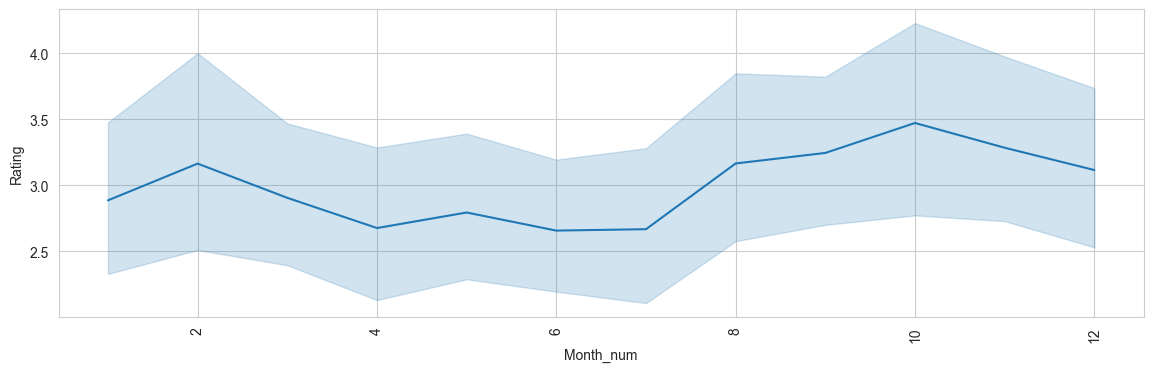

In [206]:
plt.figure(figsize=(14,4))
my_plot = sns.lineplot(x=airline_data['Month_num'],y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

[Text(2012.0, 0, '2012'),
 Text(2014.0, 0, '2014'),
 Text(2016.0, 0, '2016'),
 Text(2018.0, 0, '2018'),
 Text(2020.0, 0, '2020'),
 Text(2022.0, 0, '2022'),
 Text(2024.0, 0, '2024')]

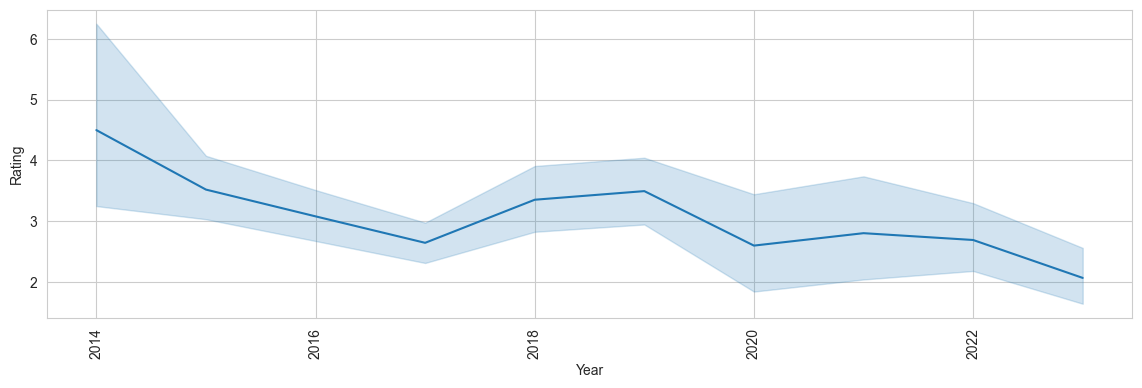

In [207]:
#Quantity of Year by Rating
plt.figure(figsize=(14, 4))
my_plot = sns.lineplot(x=airline_data['Year'], y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

#### Bivariate Analysis of Categorical Features

In [208]:
agg_data = airline_data.groupby(['Rating','Class']).size().reset_index(name='Review_Count')
agg_data = agg_data.sort_values(by=['Rating','Class'])

fig = px.bar(
    agg_data,
    x='Rating',
    y='Review_Count',
    color='Class',
    title = '# Reviews by Rating and Class',
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=500)
fig.show()

In [209]:
agg_data = airline_data.groupby(['Rating','Traveller_type']).size().reset_index(name='Review_Count')
agg_data = agg_data.sort_values(by=['Traveller_type','Rating'])
agg_data = agg_data.head(40)

fig = px.bar(
    agg_data,
    x='Rating',
    y='Review_Count',
    color='Traveller_type',
    title = 'Reviews by Rating and Traveller Type',
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=500)
fig.show()

In [210]:
agg_data_origin = airline_data.groupby(['Origin']).size().reset_index(name='Review_Count')
agg_data = airline_data.groupby(['Origin','Rating']).size().reset_index(name='Review_Count')
agg_data = pd.merge(agg_data,agg_data_origin,left_on='Origin',right_on='Origin',how='left')
agg_data = agg_data.sort_values(by=['Review_Count_y','Origin','Rating'],ascending=False)

fig = px.bar(
    agg_data.head(100),
    x='Origin',
    y='Review_Count_x',
    color='Rating',
    title = 'Reviews by Route of Origin and Rating',
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=500)
fig.show()

In [211]:
agg_data_destination = airline_data.groupby(['Destination']).size().reset_index(name='Review_Count')
agg_data = airline_data.groupby(['Destination','Rating']).size().reset_index(name='Review_Count')
agg_data = pd.merge(agg_data,agg_data_destination,left_on='Destination',right_on='Destination',how='left')
agg_data = agg_data.sort_values(by=['Review_Count_y','Destination','Rating'],ascending=False)

fig = px.bar(
    agg_data.head(100),
    x='Destination',
    y='Review_Count_x',
    color='Rating',
    title = 'Reviews by Route of Destination and Rating',
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=500)
fig.show()

In [212]:
agg_data = airline_data[["Class", "Traveller_type", "Rating"]].groupby(["Class", "Traveller_type", "Rating"]).size().reset_index(name="Count")
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Class", "Traveller_type", "Rating"],
    title="Ratings by Class and Type of Traveller",
    color="Rating",
    height=600,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    color_continuous_scale=px.colors.sequential.BuPu
)
# display the figure
fig.show()

In [213]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('<b>Relations between Rating and Month Number</b>',
                                                    '<b>Relations between Rating and Year</b>',
                                                    '<b>Relations between Rating and Type Of Traveller</b>',
                                                    '<b>Relations between Rating and Class</b>'))
fig.add_trace(go.Box(y=airline_data['Rating'], x=airline_data['Month_num']), row=1, col=1)
fig.add_trace(go.Box(y=airline_data['Rating'], x=airline_data['Year']), row=1, col=2)
fig.add_trace(go.Box(y=airline_data['Rating'], x=airline_data['Traveller_type']), row=2, col=1)
fig.add_trace(go.Box(y=airline_data['Rating'], x=airline_data['Class']), row=2, col=2)                          
fig.update_layout(showlegend=False,width=800, height=400, autosize=False, margin=dict(t=15, b=0, l=5, r=5), template="plotly_white", colorway=px.colors.qualitative.Prism)
fig.update_coloraxes(colorbar_tickfont_size=10)
fig.update_annotations(font_size=12)
fig.update_traces(opacity=0.75)
fig.show()

### Descriptive Analytics

In [214]:
airline_data['Rating'].describe().T

count    3580.000000
mean        4.789385
std         3.168245
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: Rating, dtype: float64

### Normality Test

In [215]:
#Perform Shapiro test to check the normality of the distribution 
stat, p = shapiro(airline_data['Rating'])
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.886, p=0.886
Probably not Gaussian


<Axes: title={'center': 'Class'}, ylabel='Frequency'>

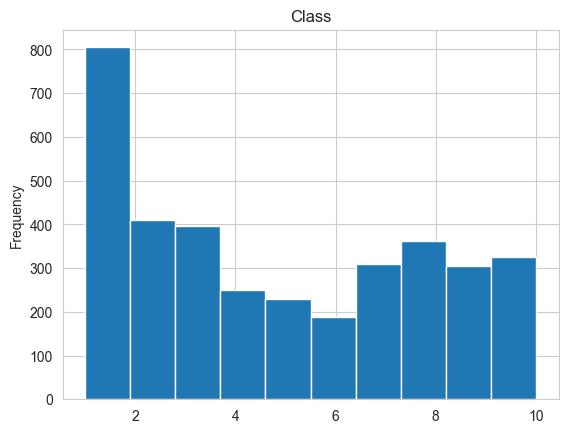

In [216]:
##Create a Histogram
airline_data['Rating'].plot(kind = 'hist', title = 'Class')
#From de Graph we could be a Normal distribution data

### Encoding

In [217]:
airline_data_encoded = airline_data[['Rating','Traveller_type','Class','Origin','Destination','Month_num','Year']]

enc = LabelEncoder()
airline_data_encoded['Traveller_type'] = enc.fit_transform(airline_data_encoded['Traveller_type'])
airline_data_encoded['Class'] = enc.fit_transform(airline_data_encoded['Class'])
airline_data_encoded['Origin'] = enc.fit_transform(airline_data_encoded['Origin'])
airline_data_encoded['Destination'] = enc.fit_transform(airline_data_encoded['Destination'])

In [218]:
airline_data_encoded

,Rating,Traveller_type,Class,Origin,Destination,Month_num,Year
0,1.0,3,1,166,260,6.0,2023.0
1,1.0,1,0,130,18,3.0,2023.0
2,2.0,3,0,130,73,NaN,NaN
3,4.0,3,1,5,260,6.0,2023.0
4,7.0,2,0,130,207,NaN,NaN
...,...,...,...,...,...,...,...
3575,4.0,4,1,255,488,NaN,NaN
3576,4.0,4,1,255,488,NaN,NaN
3577,4.0,4,1,255,488,NaN,NaN
3578,6.0,4,0,255,488,NaN,NaN


,Rating,Traveller_type,Class,Origin,Destination,Month_num,Year
Rating,1.000000,0.231539,-0.007844,0.155289,0.163668,0.053718,-0.095656
Traveller_type,0.231539,1.000000,0.066685,0.517782,0.483033,0.056288,0.031434
Class,-0.007844,0.066685,1.000000,-0.006611,-0.004827,0.047518,-0.022429
Origin,0.155289,0.517782,-0.006611,1.000000,0.480735,0.014539,-0.029129
Destination,0.163668,0.483033,-0.004827,0.480735,1.000000,0.028053,-0.017641
Month_num,0.053718,0.056288,0.047518,0.014539,0.028053,1.000000,-0.282043
Year,-0.095656,0.031434,-0.022429,-0.029129,-0.017641,-0.282043,1.000000


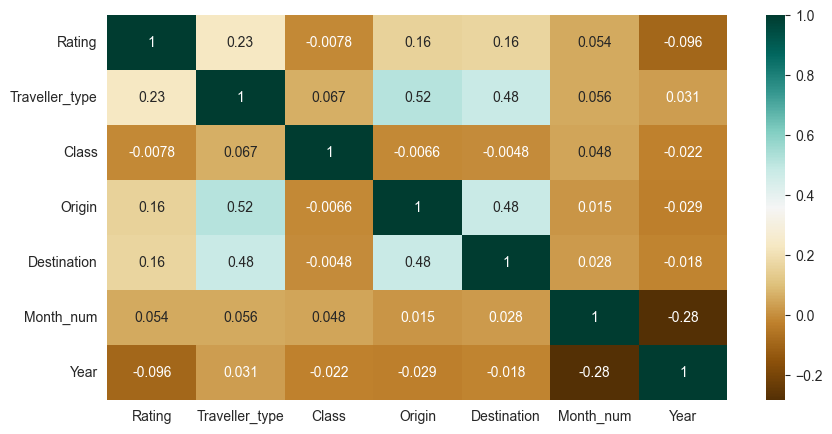

In [219]:
plt.figure(figsize=(10,5))
matrix= airline_data_encoded.corr()
sns.heatmap(matrix,cmap="BrBG",annot=True)
matrix

# 4. Research Questions

## 4.1 Are the customers “Class” flight selections influenced by the “Route”?
o	Null Hypothesis: There is no relationship between Class and Route Origin
o	Alternative Hypothesis: There is relationship between Class and Route Origin

o	Null Hypothesis: There is no relationship between Class and Route Destiny
o	Alternative Hypothesis: There is relationship between Class and Route Destiny

In [246]:
# Chi-Squared Test
table = pd.crosstab(airline_data['Class'],airline_data['Origin'])
chi2, p, dof, ex = stats.chi2_contingency(table)
if p > 0.05:
    print('Probably independent - p-value:')
    print('p-value:' and p)
else:
    print('Probably dependent')
    print('p-value:' and p)

Probably dependent
0.011229270174951607


In [238]:
agg_data_origin = airline_data.groupby(['Origin']).size().reset_index(name='Review_Count')
agg_data = airline_data.groupby(['Origin','Class']).size().reset_index(name='Review_Count')
agg_data = pd.merge(agg_data,agg_data_origin,left_on='Origin',right_on='Origin',how='left')
agg_data = agg_data.sort_values(by=['Review_Count_y','Origin','Class'],ascending=False)

fig = px.bar(
    agg_data.head(20),
    x='Origin',
    y='Review_Count_x',
    color='Class',
    title = 'Reviews by Route of Origin and Class',
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=500)
fig.show()

In [248]:
# Chi-Squared Test
table = pd.crosstab(airline_data['Class'],airline_data['Destination'])
chi2, p, dof, ex = stats.chi2_contingency(table)
if p > 0.05:
    print('Probably independent - p-value:')
    print('p-value:' and p)
else:
    print('Probably dependent')
    print('p-value:' and p)

Probably dependent
0.0017120455251508073


In [250]:
agg_data_destination = airline_data.groupby(['Destination']).size().reset_index(name='Review_Count')
agg_data = airline_data.groupby(['Destination','Class']).size().reset_index(name='Review_Count')
agg_data = pd.merge(agg_data,agg_data_destination,left_on='Destination',right_on='Destination',how='left')
agg_data = agg_data.sort_values(by=['Review_Count_y','Destination','Class'],ascending=False)

fig = px.bar(
    agg_data.head(20),
    x='Destination',
    y='Review_Count_x',
    color='Class',
    title = 'Reviews by Route of Destination and Class',
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=500)
fig.show()

## 4.2 Are the customers travelling in holidays more satisfied?
  o Null Hypothesis: There is no relationship between Rating and Flying Month
  o Alternative Hypothesis: There is relationship between Rating and Flying Month



[Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6'),
 Text(8.0, 0, '8'),
 Text(10.0, 0, '10'),
 Text(12.0, 0, '12'),
 Text(14.0, 0, '14')]

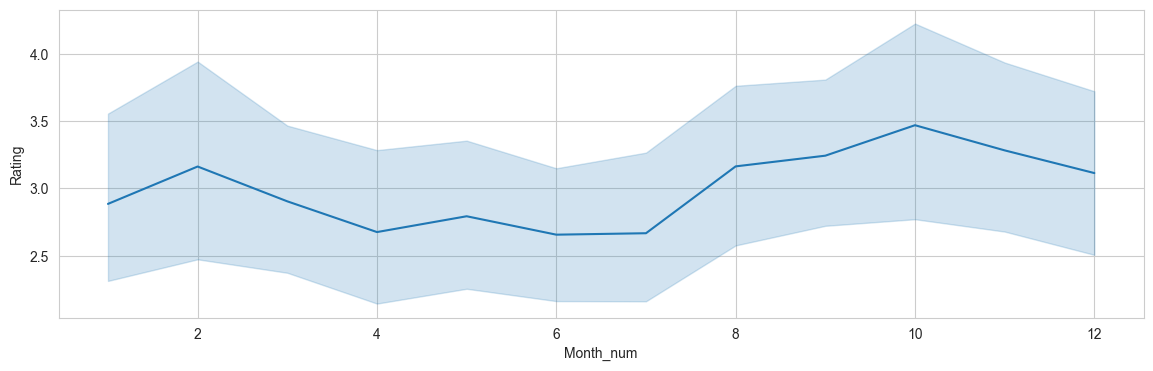

In [255]:
plt.figure(figsize=(14,4))
my_plot = sns.lineplot(x=airline_data['Month_num'],y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=0)

[Text(2012.0, 0, '2012'),
 Text(2014.0, 0, '2014'),
 Text(2016.0, 0, '2016'),
 Text(2018.0, 0, '2018'),
 Text(2020.0, 0, '2020'),
 Text(2022.0, 0, '2022'),
 Text(2024.0, 0, '2024')]

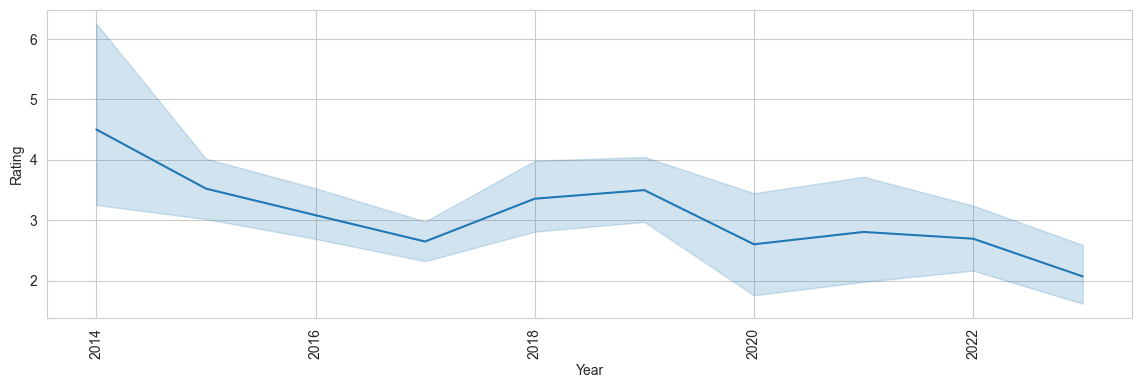

In [225]:
plt.figure(figsize=(14,4))
my_plot = sns.lineplot(x=airline_data['Year'],y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

## 4.3 What kind of customers are more likelihood to have a successful travel? 
o	Null Hypothesis: There is no significance difference in the average rating based on Class.
o	Alternative Hypothesis: There is significance difference in the average rating based on Class.

o	Null Hypothesis: There is no significance difference in the average rating based on Traveller Type
o	Alternative Hypothesis: There is significance difference in the average rating based on Traveller Type




In [226]:
## T-Test (Numerical vs Categorical) <= 2 Groups
data1 = airline_data_encoded['Rating']
data2 = airline_data_encoded['Class']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=70.133, p=70.133
Probably different distributions


[Text(0, 0, 'Economy Class'),
 Text(1, 0, 'Business Class'),
 Text(2, 0, 'Premium Economy'),
 Text(3, 0, 'First Class')]

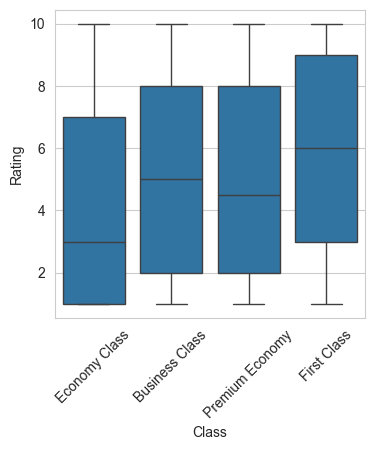

In [258]:
plt.figure(figsize=(4,4))
my_plot = sns.boxplot(x=airline_data['Class'],y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

In [228]:
## T-Test (Numerical vs Categorical) <= 2 Groups
data1 = airline_data_encoded['Rating']
data2 = airline_data_encoded['Traveller_type']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=47.048, p=47.048
Probably different distributions


[Text(0, 0, 'Solo Leisure'),
 Text(1, 0, 'Couple Leisure'),
 Text(2, 0, 'Family Leisure'),
 Text(3, 0, 'Business'),
 Text(4, 0, 'Unknown')]

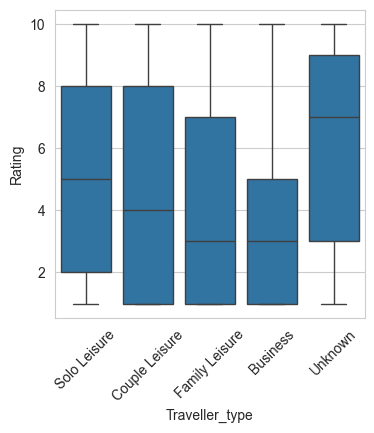

In [260]:
plt.figure(figsize=(4,4))
my_plot = sns.boxplot(x=airline_data['Traveller_type'],y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

## 4.4 What are the most popular satisfied routes in “British Airways” airline?
o	Null Hypothesis: There is no significance difference in the average rating based on Route Origin
o	Alternative Hypothesis: There is significance difference in the average rating based on Route Origin

o	Null Hypothesis: There is no significance difference in the average rating based on Route Destiny
o	Alternative Hypothesis: There is significance difference in the average rating based on Route Destiny



In [230]:
subset_type = airline_data[(airline_data['Traveller_type'].str.contains('|'.join(['Solo Leisure','Couple Leisure','Family Leisure','Business']), na=False))]

[Text(0, 0, 'London'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Johannesburg'),
 Text(3, 0, 'Singapore'),
 Text(4, 0, 'Vancouver'),
 Text(5, 0, 'Los Angeles'),
 Text(6, 0, 'Bangkok'),
 Text(7, 0, 'Miami'),
 Text(8, 0, 'Glasgow'),
 Text(9, 0, 'Manchester'),
 Text(10, 0, 'Cape Town')]

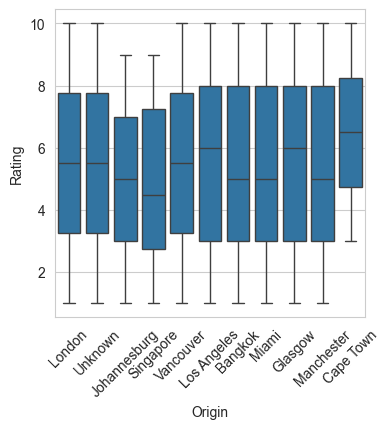

In [262]:
agg_data_origin = airline_data.groupby(['Origin']).size().reset_index(name='Review_Count')
agg_data = airline_data.groupby(['Origin','Rating']).size().reset_index(name='Review_Count')
agg_data = pd.merge(agg_data,agg_data_origin,left_on='Origin',right_on='Origin',how='left')
agg_data = agg_data.sort_values(by=['Review_Count_y','Origin','Rating'],ascending=False)

plt.figure(figsize=(4,4))
my_plot = sns.boxplot(x=agg_data['Origin'].head(100),y=agg_data['Rating'].head(100))
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

[Text(0, 0, 'London'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Cape Town'),
 Text(3, 0, 'Johannesburg'),
 Text(4, 0, 'Singapore'),
 Text(5, 0, 'Dubai'),
 Text(6, 0, 'Bangkok'),
 Text(7, 0, 'Hong Kong'),
 Text(8, 0, 'Miami'),
 Text(9, 0, 'Vancouver'),
 Text(10, 0, 'Amsterdam')]

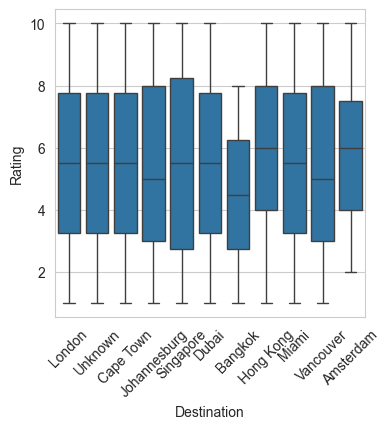

In [263]:
agg_data_destination = airline_data.groupby(['Destination']).size().reset_index(name='Review_Count')
agg_data = airline_data.groupby(['Destination','Rating']).size().reset_index(name='Review_Count')
agg_data = pd.merge(agg_data,agg_data_destination,left_on='Destination',right_on='Destination',how='left')
agg_data = agg_data.sort_values(by=['Review_Count_y','Destination','Rating'],ascending=False)

plt.figure(figsize=(4,4))
my_plot = sns.boxplot(x=agg_data['Destination'].head(100),y=agg_data['Rating'].head(100))
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

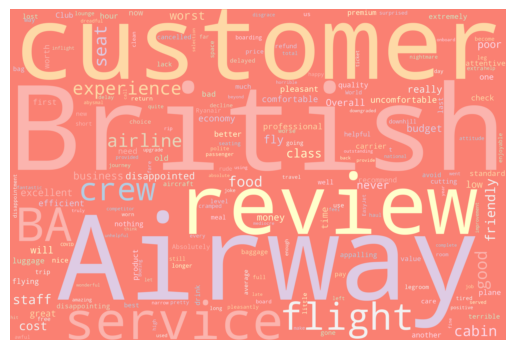

In [233]:
text = " ".join(title for title in airline_data.Review_title)

word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

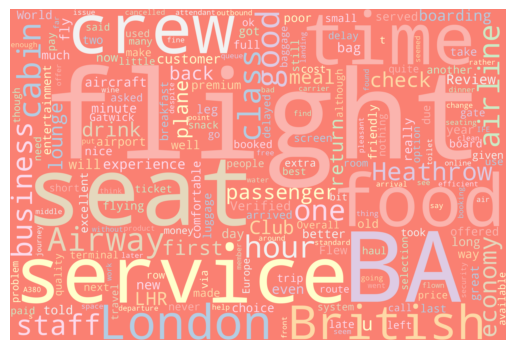

In [234]:
text = " ".join(title for title in airline_data.Review_content)

word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()